In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import ipywidgets
from ipywidgets import interact
from scipy.spatial.distance import cdist
from scipy.spatial import distance
from sympy import Symbol
from sympy import sin, cos
from sympy import oo
from sympy import *
from numpy import exp, pi, arange, real, imag, abs, angle, sqrt
from numpy import sin, sqrt, cos
from scipy import signal
from matplotlib import animation, rc
from IPython.display import HTML

# Carpeta #1

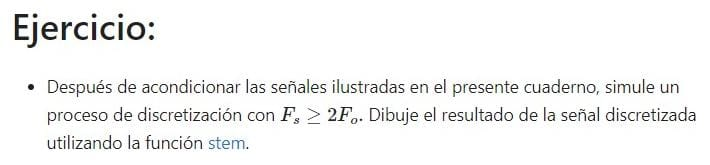

<ipython-input-3-82d7a8db89e3>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(x, x_tk, use_line_collection=True, linefmt='C6:',  markerfmt='C4o')


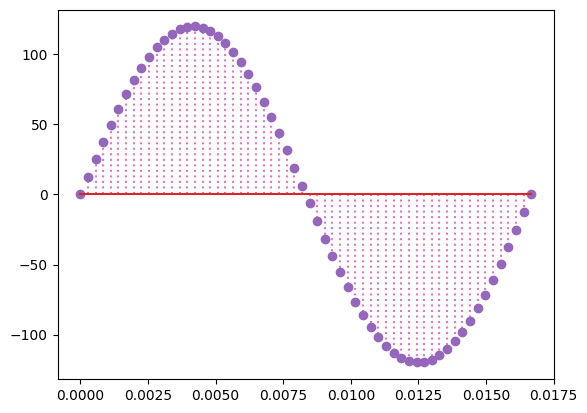

In [3]:
J = 60 #int(input("ingrese el numero de muestras ")) #Número de muestras
T_o = 1/60 #Periodo de la función
ti = 0 #Tiempo incial
tf = T_o #Tiempo final
A = 120 #Amplitud
tv = np.linspace(start=ti,stop=tf,num=J) #Vcetor muestras
x_tk = A * np.sin(2*np.pi*tv/T_o) #Vector Amplitud

#Funcion Steam

x = np.linspace(ti, tf, J) #Periodo de muestreo

plt.stem(x, x_tk, use_line_collection=True, linefmt='C6:',  markerfmt='C4o')
plt.show()

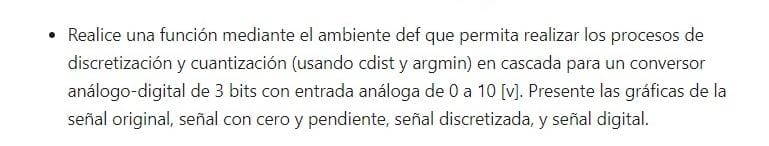

In [4]:
def my_ceropen(x,ymin = -5, ymax = 5):
  #Codigo para simular proceso de cero y pendiente
  xmax = max(x) # x.max()                    #Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv  #Funcion con valores max y min

def Discretizar_cuantizar_y_graficar(A,f,fs,nbits,ymaxima,yminima):
 #Definimos la función
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.spatial.distance import  cdist

 T_o=1/f           #Definiendo parametros
 ti=0
 tf=3*T_o
 k=500             #Cantidad de muestras para la señal
 tv=np.linspace(ti,tf,k)
 xv = A * np.cos(2*f*np.pi*tv) #Vector de amplitud
 yv=my_ceropen(xv,yminima,ymaxima)  #Definiendo un valor de amplitud máximo y mínimo
 #Discretizacion
 n=np.arange(ti,tf,1/fs)  #Cantidad de muestras
 xn=A*np.cos(2*np.pi*f*n) #Amplitud de muestras
 yn=my_ceropen(xn,yminima,ymaxima)   #Calculando cero y pendiente para tener la funcion en los limites
 #Cuantizacion
 rmin = yminima
 rmax = ymaxima
 ve = np.linspace(rmin,rmax,2**nbits) #Calcula la cantidad de cajones dado el numero de bits
 d = cdist(yn.reshape(-1,1),ve.reshape(-1,1)) #Calcula la distancia entre cada muestra y los intervalos de bits                                       ¨duda¨
 ind = np.argmin(d,axis=1) #Calcula la mejor aproximación entre el valor real y el digital                                                              ¨duda¨
 #Grafica
 plt.subplot(311)
 plt.plot(tv,xv,".r")
 plt.subplot(312)
 plt.plot(tv,yv,".y")
 plt.subplot(313)
 plt.stem(n,ve[ind])  #Graficando las muestras de tiempo discreto contra la menor amplitud para cada caso


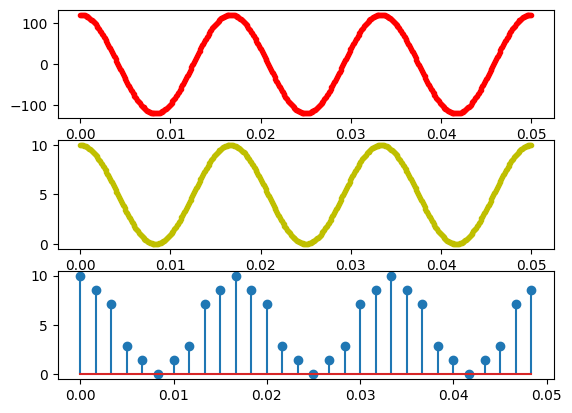

In [5]:
Discretizar_cuantizar_y_graficar(120,60,600,3,10,0)

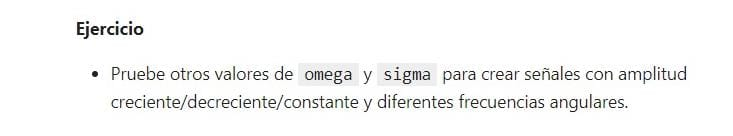

In [6]:
#Codigo para crear señales con amplitud constante creciente y decreciente

import sympy as sym

sym.init_printing() #se inicializa para mostrar en pantalla ¨duda¨

t,omega,sigma=sym.symbols("t omega sigma" ,real=True)

                                   #"""Para crear varias señales se hará una función dependiente de omega t y sigma"""

def señal(omega,sigma):
  señal_1=sym.exp(t*((1j*omega) + sigma))
  sym.plot(sym.re(señal_1.subs({omega:omega,sigma:sigma})),(t,-5,5))

Cuando sigma < 0
 obtenemos una grafica en la cual su onda va disminuyendo su oscilacion cada vez más.

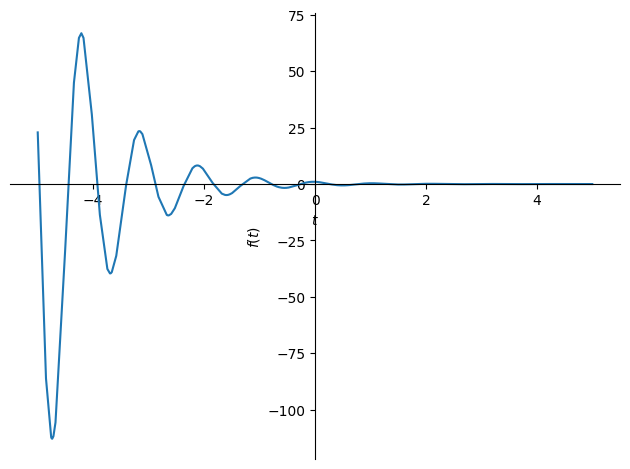

In [7]:
señal(6,-1)

Cuando sigma > 0
 podemos observar en la grafica que su oscilacion aumenta.



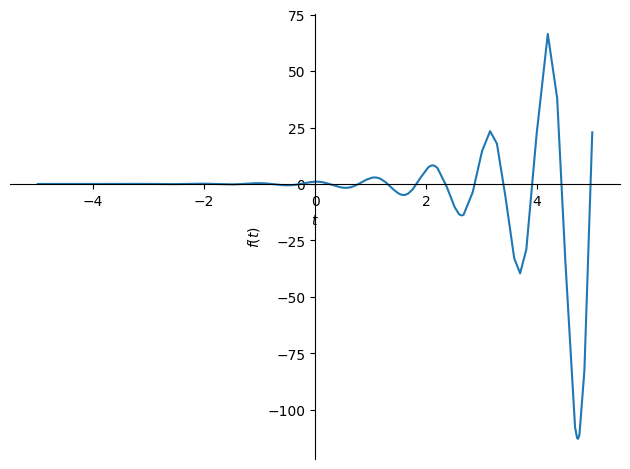

In [8]:
señal(6,1)

Cuando sigma = 0
 su oscilacion es constante.

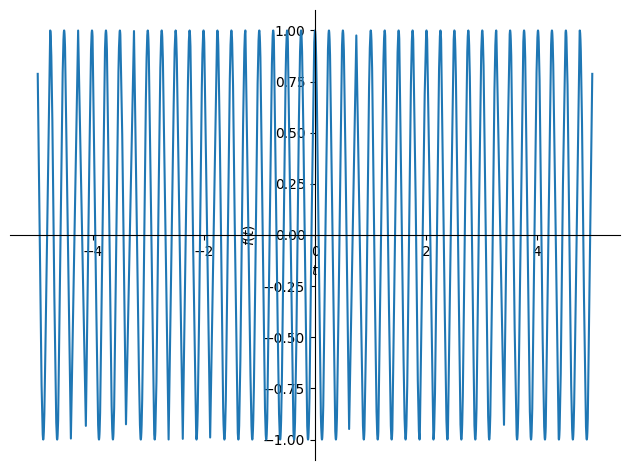

In [9]:
señal(25,0)

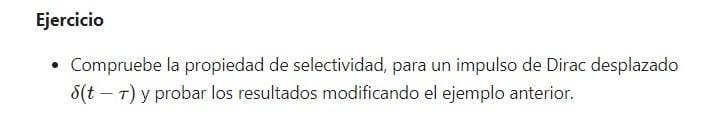

In [10]:
tau = sym.symbols('tau ', real=True)
g = t**2+3*sym.cos(2*t)
delta_T = sym.DiracDelta(t-2)
m=((sym.integrate(delta_T*g, (t, -sym.oo, sym.oo))))
print(m)

3*cos(4) + 4


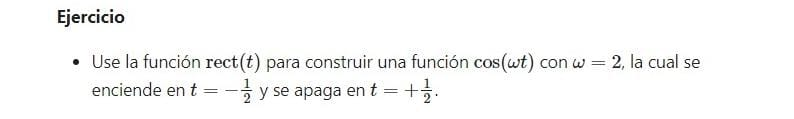

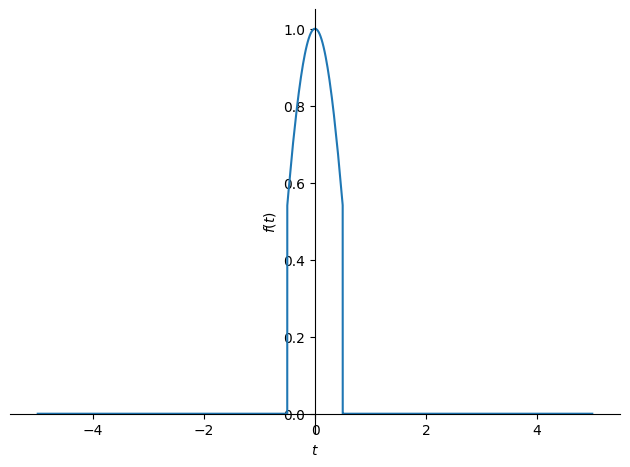

In [11]:
m=(sym.Heaviside(t+1/2)-sym.Heaviside(t-1/2)) #Primer heaviside nos dice donde se enciende la señal y el segundo donde se apaga
señal=sym.cos(2*t)
sym.plot(señal*m,(t,-5,5))

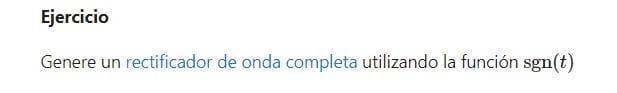

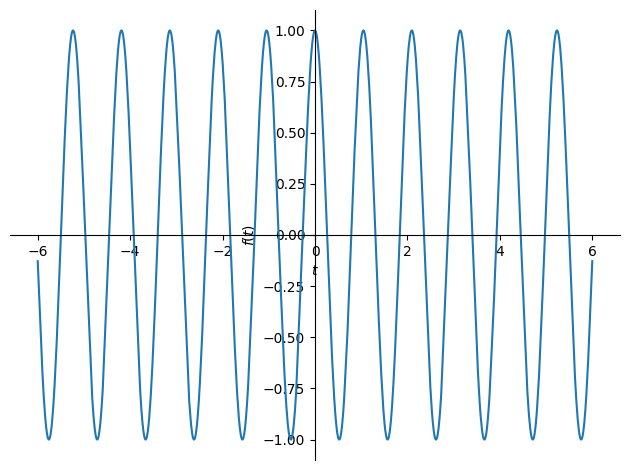

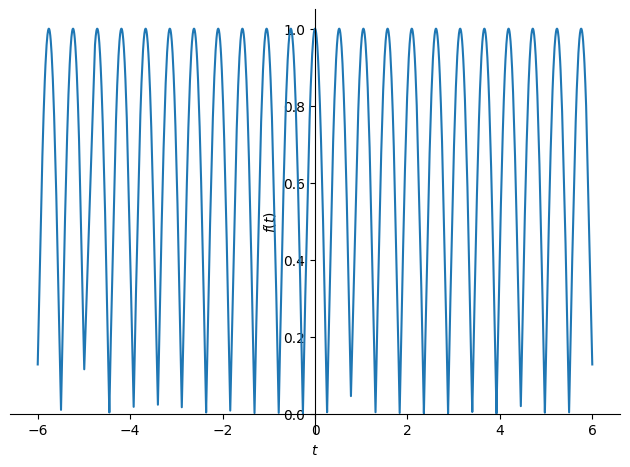

In [12]:
señal1=sym.cos(6*t)
señal=señal1*sym.sign(señal1)
sym.plot(señal1,(t,-6,6)) #Entrega la grafica de la funcion sin rectificar
sym.plot(señal,(t,-6,6))  #Entrega la grafica de la funcion sin rectificada

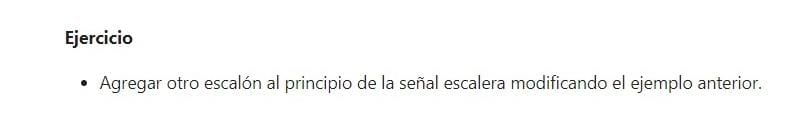

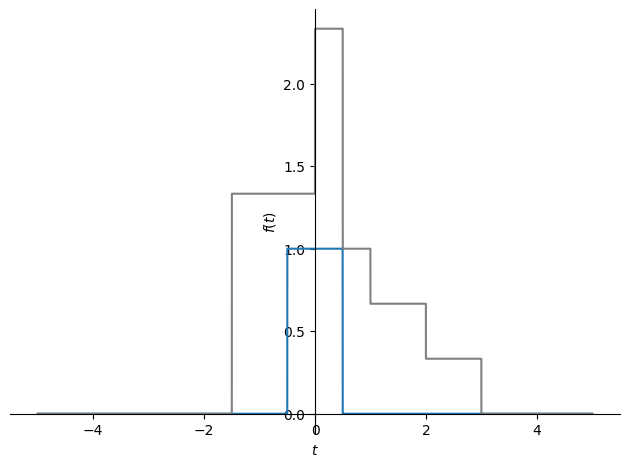

In [13]:
rect = sym.Heaviside(t + 1/2) - sym.Heaviside(t - 1/2)
x =4/3*rect.subs(t,1/2*(t+1/2))+ rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)#los rect desplazados se acoplan con escalamientos diferentes
px=sym.plot(rect,(t,-5,5),show=False)
p=sym.plot(x,(t, -5, 5),line_color='gray',show=False)
px.extend(p)
px.show()

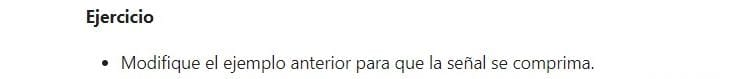

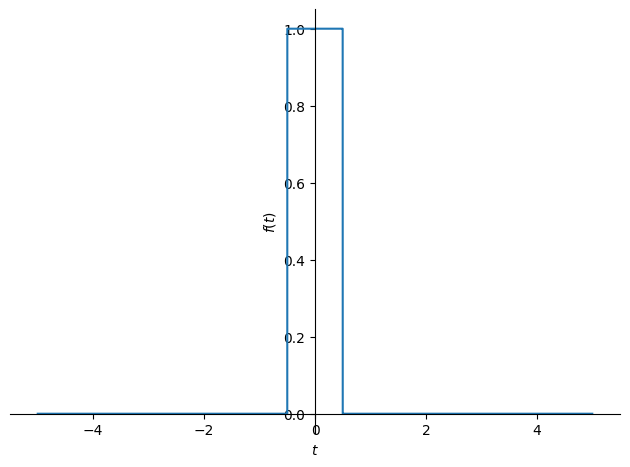

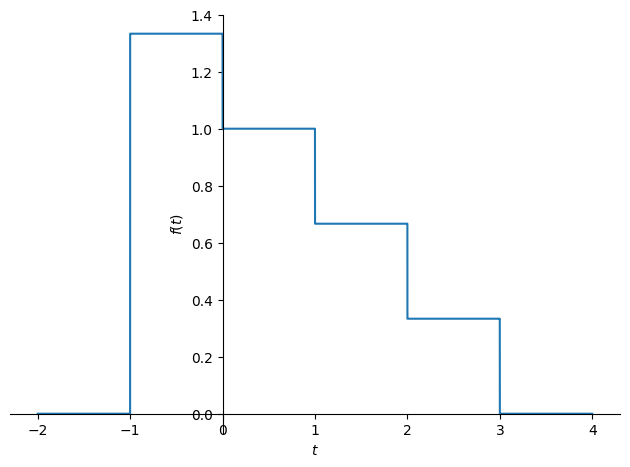

In [14]:
rect = sym.Heaviside(t + (1/2)) - sym.Heaviside(t - (1/2))
sym.plot(rect,(t,-5,5))
#Los rect desplazados se acoplan con escalamientos diferentes
x =4/3*rect.subs(t,(t+(1/2)))+ rect.subs(t,(t-(1/2))) + 2/3*rect.subs(t,t-(3/2)) + 1/3*rect.subs(t, (t-(5/2)))
sym.plot(x,(t, -2, 4))

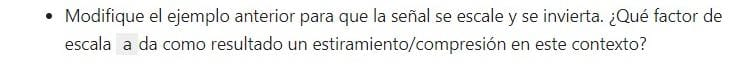

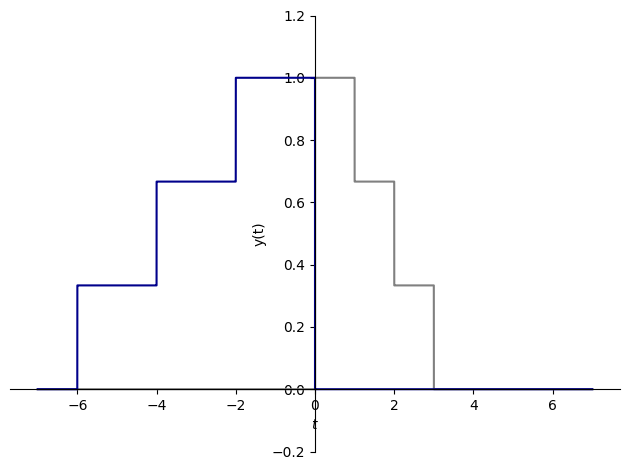

In [15]:
#Señal escalada e invertida
a = sym.symbols('a', real=True)
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
y = x.subs(t, a*t)

#Dentro del mismo gráfico muestre ambas líneas.
px = sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'y(t)', show=False, line_color='gray')
py = sym.plot(y.subs(a,-0.5), (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'y(t)', show=False,line_color='darkblue')
px.extend(py)#Se extiende los gráficos sobre una misma figura
px.show()

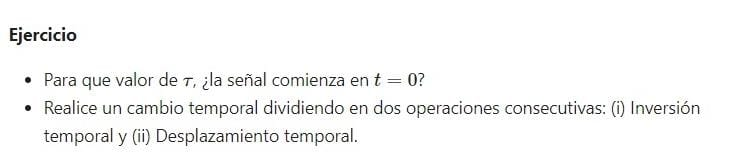

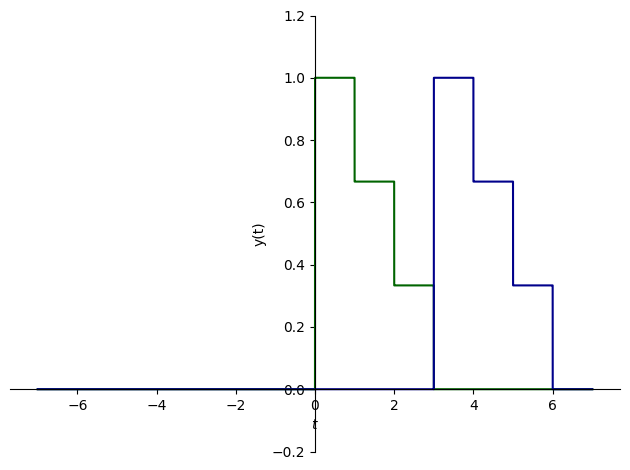

In [16]:
#Desplazamiento temporal
tau =-3
t=sym.symbols('t')

rect = sym.Heaviside(t + 0.5) - sym.Heaviside(t - 0.5)

#Los rect desplazados se acoplan con escalamientos diferentes
x = rect.subs(t, t-1/2) + 2/3*rect.subs(t, t-3/2) + 1/3*rect.subs(t, t-5/2)
y = x.subs(t, t+tau)

px=sym.plot(x, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'y(t)', line_color='darkgreen', show=False)
py=sym.plot(y, (t, -7, 7), ylim=[-0.2, 1.2], ylabel=r'y(t)', show=False, line_color='darkblue')
px.extend(py)
px.show()

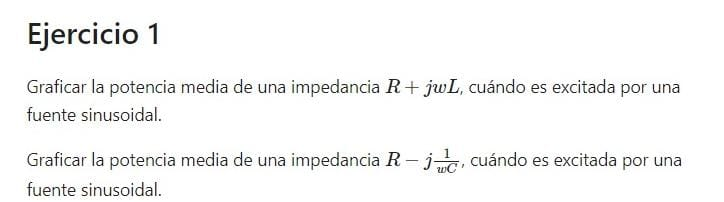

<function matplotlib.pyplot.show(close=None, block=None)>

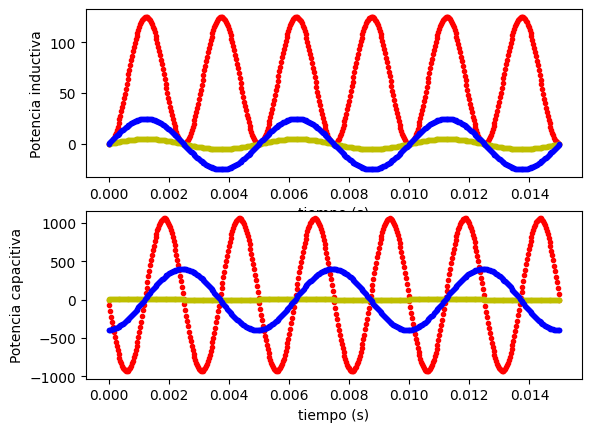

In [21]:
"Parámetros del circuito"
#R:resistencia
#L:inductancia
#f:frecuencia
#To:tiempo de la señal
#Vm,Im: voltaje(corriente) pico
#Xl:Reactancia inductiva
#Xc:Reactancia capacitiva
#fase: Fase

"Para una impedancia inductiva"

R=3
L=0.00001
C=0.00001
f=200
To=3/f
k=500
Vm=5
R=5
Xl=L*2*np.pi*f
Xc=1/(2*np.pi*f*C)

Im=Vm*np.sqrt((R**2)+(Xl**2))
fase=np.arctan(Xl/R)
tv=np.linspace(0,To,k)
v=Vm*np.sin(2*np.pi*f*tv)
i=Im*np.sin(2*np.pi*f*tv+fase)

p=i*v

plt.subplot(211)
plt.plot(tv,p,".r")
plt.plot(tv,v,".y")
plt.plot(tv,i,".b")
plt.xlabel("tiempo (s)")
plt.ylabel("Potencia inductiva")
plt.show

"Para una impedancia capacitiva"

Im=Vm*np.sqrt((R**2)+(Xc**2))
fase=np.arctan(-Xc/R)
i=Im*np.sin(2*np.pi*f*tv+fase)
p=i*v

plt.subplot(212)
plt.plot(tv,p,".r")
plt.plot(tv,v,".y")
plt.plot(tv,i,".b")
plt.xlabel("tiempo (s)")
plt.ylabel("Potencia capacitiva")
plt.show

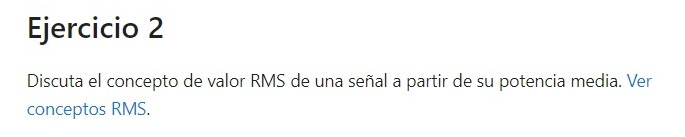

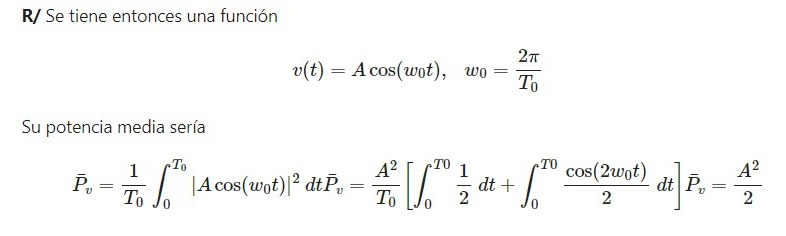

In [ ]:
#@title Proceso de encontrar gráfica el valor  RMS
warnings.filterwarnings("ignore")

w = symbols('w', real = True, nonzero = True)
t, I_max = symbols('t, I_max', real = True)
T0 = 2*pi/w

w0 = 2*pi
T0 = T0.subs(w, w0)
sig = 4*sym.sin(w0*t)
p_ins = sig ** 2
P = integrate(sig**2, (t, 0, T0)) /T0

t_limits = (t, 0, 3)
ylim=[-5, 18]
p1 = plot(sig, t_limits, ylim=ylim,show = False, line_color = 'orange', legend = True, label="Función original")
p2 = plot(p_ins, t_limits, ylim=ylim, show = False, legend = True, label="Función al cuadrado")
p3 = plot(P, t_limits, ylim=ylim, show = False, line_color = 'green', legend = True, label="RMS")
p1.extend(p2)
p1.extend(p3)
p1.show()

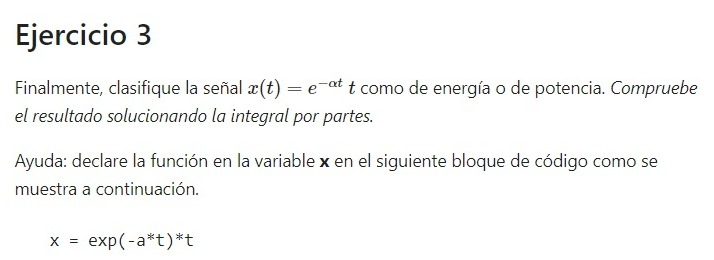

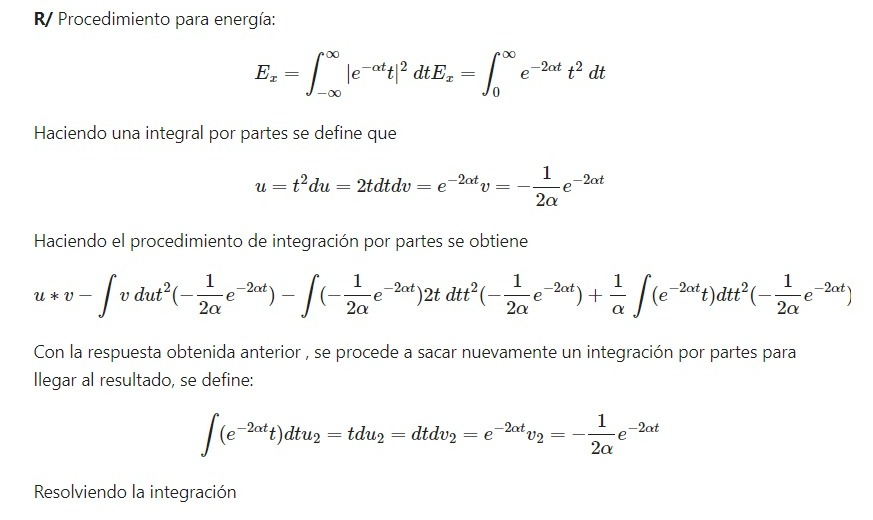

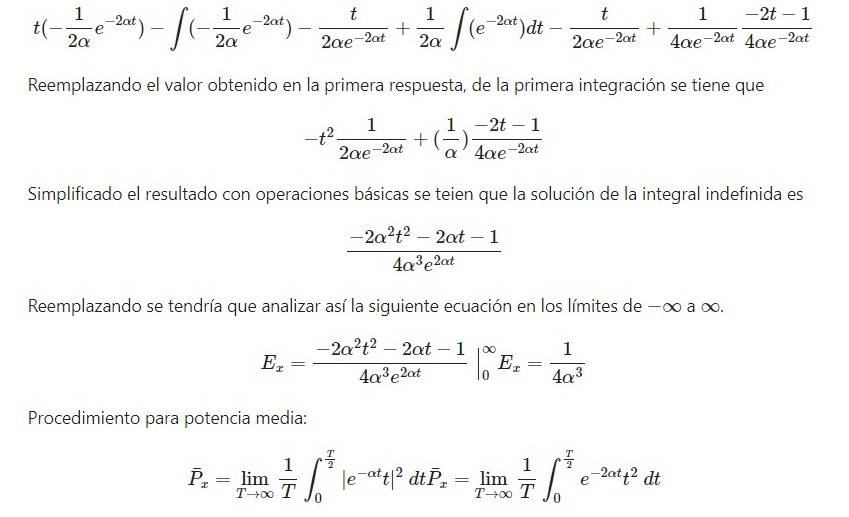

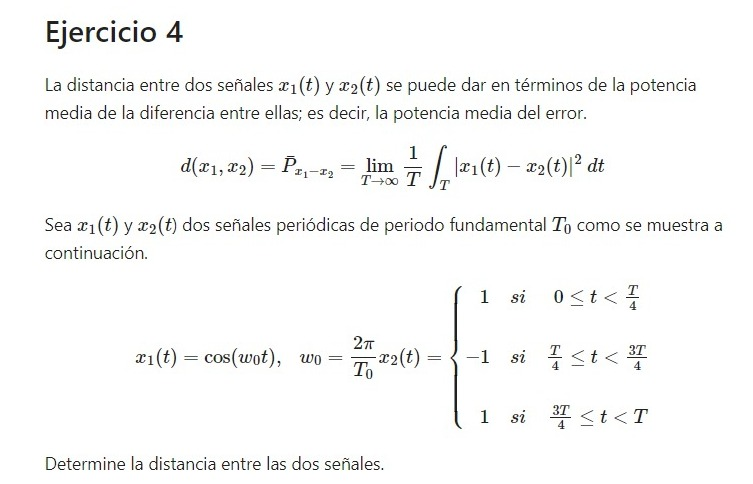

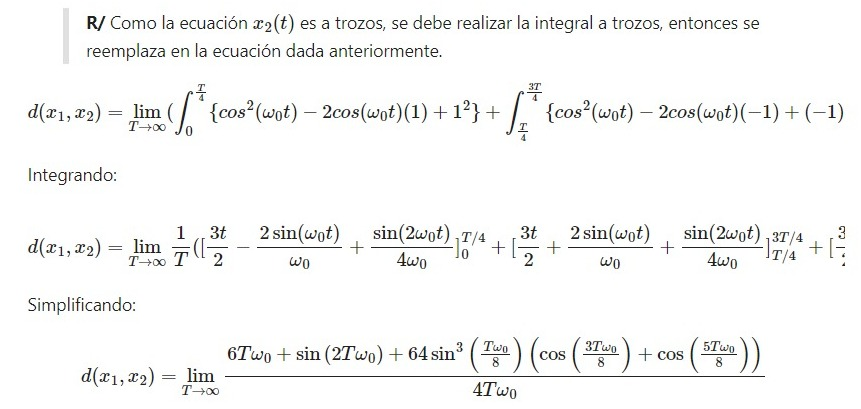

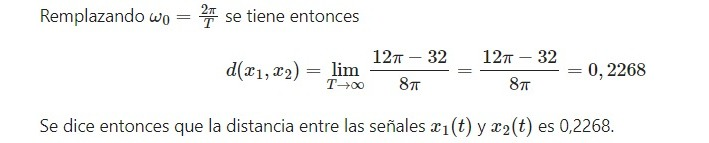

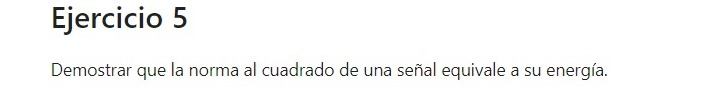

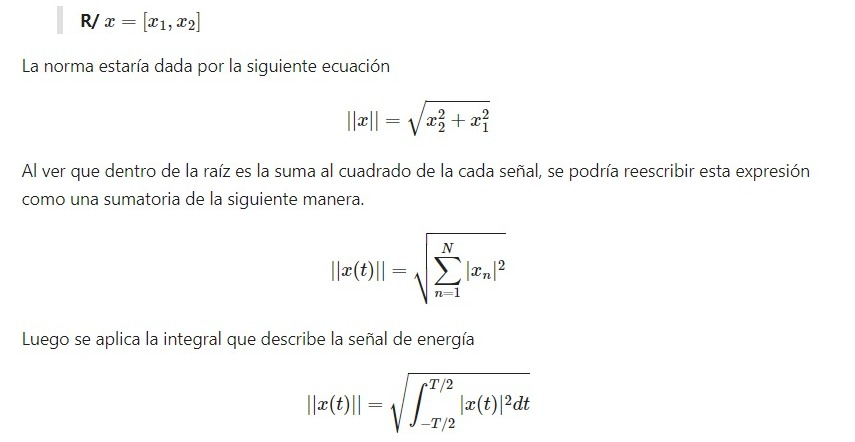

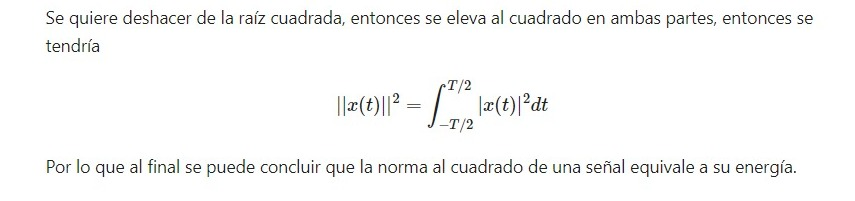

# Carpeta #2

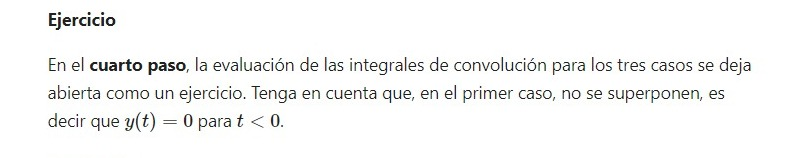

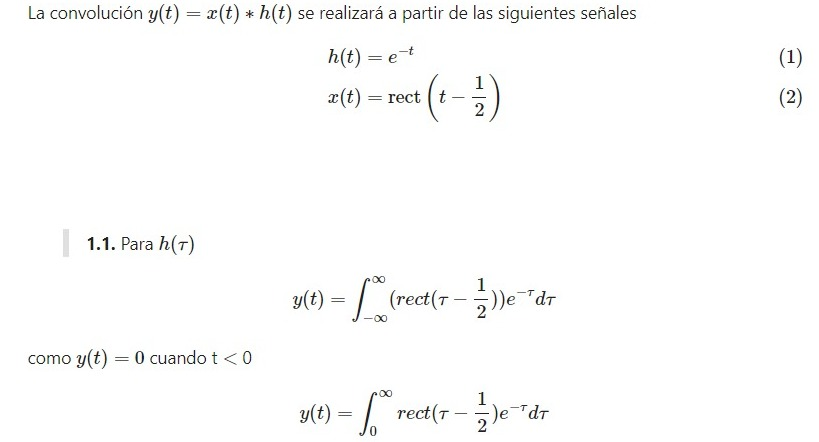

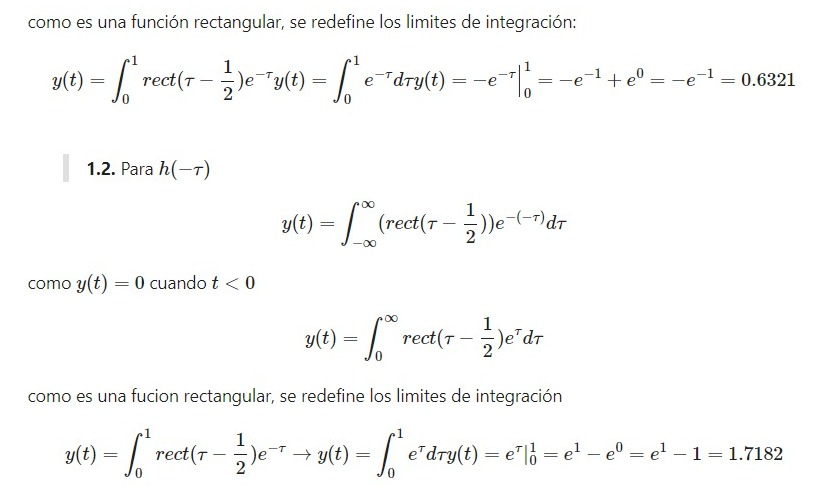

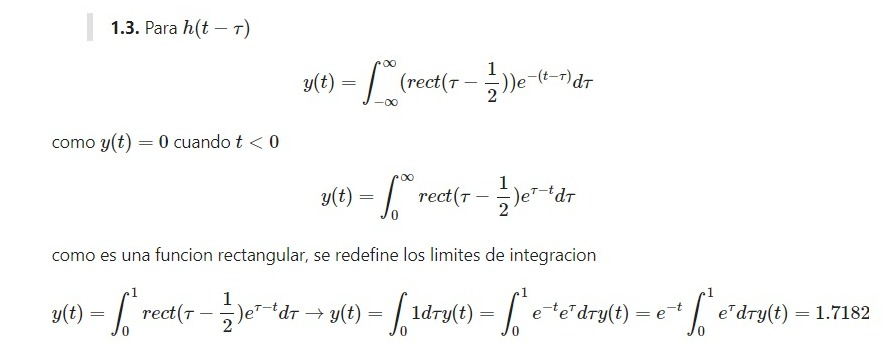

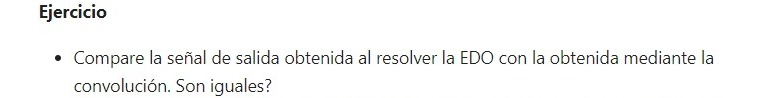

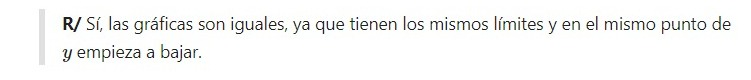

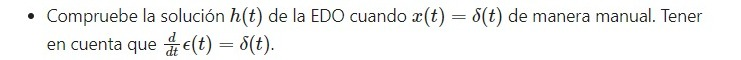

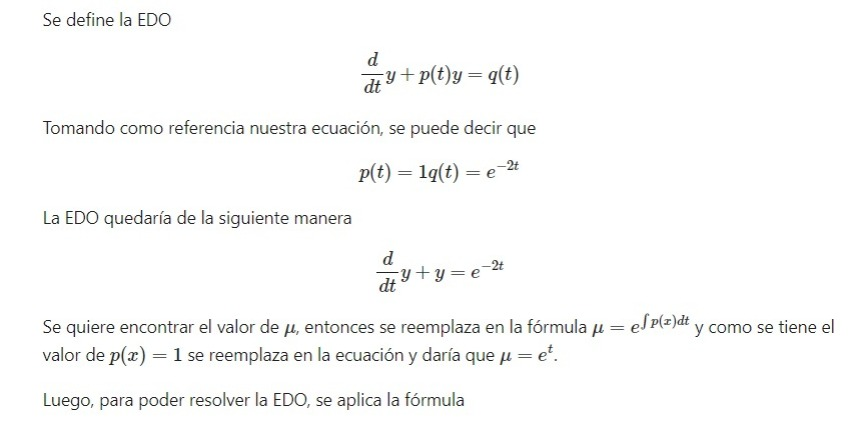

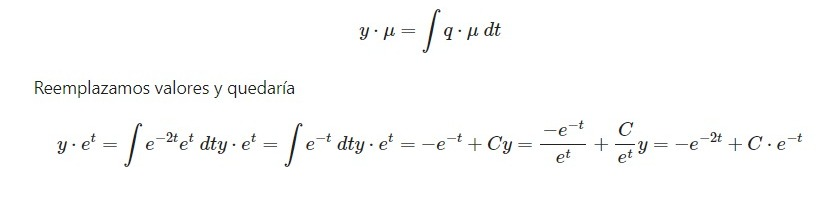

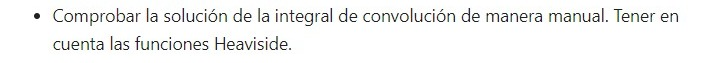

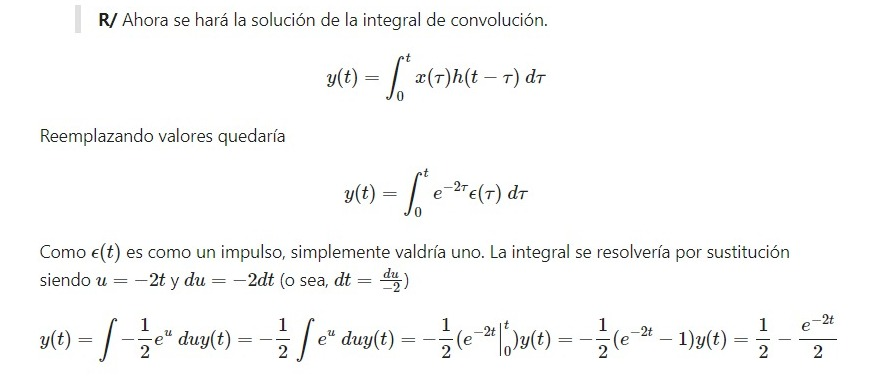